In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import datasets, model_selection, preprocessing, model_selection
from sklearn import neighbors, linear_model, naive_bayes,metrics, preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import bernoulli
from pytictoc import TicToc
import matplotlib.pyplot as plt
from random import *
%matplotlib inline 
t = TicToc()
#####
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
#####
data = pd.read_csv('C:/Users/annak/Desktop/default of credit card clients.csv', sep=';')
data = data[:100]            # We start with this small sample as an example

##################################################
# Shapley Value Computation based on Owen Sampling
##################################################

Q = 100                      # Integral's discretisation parameter (Rectangle Rule: for simplicity). Other Rules can be used !
M = 100                      # Sample Size for the empirical estimator of the expectation
d = len(data.columns)-1 
Sh = np.zeros([1,d])[0]
t.tic()
for q in range(0,Q+1):
    e = np.zeros([1,d])[0]
    for m in range(M):
        B = bernoulli.rvs(q/Q, size = d)
        while list(B) != list(np.ones([1,d])[0]):
            I = B
            break
        for j in range(d):
            X_j = np.zeros([1,d])[0]
            X_j[j] = 1

            L2, K = [], []
            for i in range(d):
                L2.append(int(I[i])*data.columns[i])
                K.append((int(X_j[i])*data.columns[i]))
            L1 = list(set(L2 + K))
            L2 = list(set((L2)))
            L1.remove('')
            L2.remove('')
            L1.append('default payment next month')
            L2.append('default payment next month')


            ##################################################
            # K-NN Classifier (As an example)
            # The cost function here is the classifier's score
            ##################################################

            data1 = data[L1]
            X_train, X_test, y_train, y_test = train_test_split(np.array(data1)[:,:-1], np.array(data1)[:,-1], test_size=0.2, random_state=42)
            knn = neighbors.KNeighborsClassifier(n_neighbors=5)  
            knn.fit(X_train,y_train) 
            c1 = knn.score(X_test,y_test)
            ###
            if L2 == ['default payment next month']:
                c2 = 0
            else:

                data2 = data[L2]
                X_train, X_test, y_train, y_test = train_test_split(np.array(data2)[:,:-1], np.array(data2)[:,-1], test_size=0.2, random_state=42)
                knn = neighbors.KNeighborsClassifier(n_neighbors=5)  
                knn.fit(X_train,y_train) 
                c2 = knn.score(X_test,y_test)
            ##
            e[j] += c1-c2
    Sh += e
    print(q)
t.toc()
Sh = Sh*(1/(Q*M))  # Vector of Features' Shapley Values
# Elapsed time: 42min38sec

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
Elapsed time is 2542.794910 seconds.


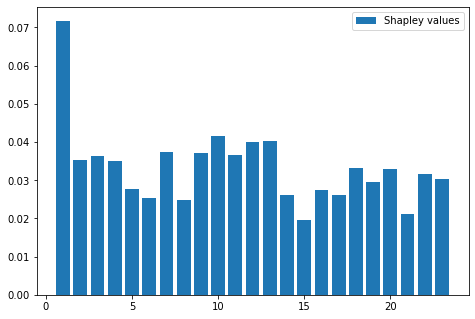

In [93]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([i for i in range(1,len(data.columns))],Sh)
ax.legend(labels=["Shapley values"])

In [95]:
Sh

array([0.071775, 0.03528 , 0.03636 , 0.035025, 0.027755, 0.025295,
       0.037425, 0.024815, 0.037185, 0.041425, 0.03659 , 0.040105,
       0.040375, 0.02609 , 0.019585, 0.02746 , 0.02603 , 0.03329 ,
       0.02957 , 0.032915, 0.021015, 0.03149 , 0.03019 ])